In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Librería con funciones para el bid y ask
import bid_ask_lib as b_a
from functools import partial

### Primer Proyecto: Optimización del Bid y Ask

**Proyecto creado por**
- Gustavo de Anda Madrigal 
- Maximiliano Jiménez Ramírez
- Andrés Martínez Covarrubias
- Sebastián Monsalve Gallegos

En este primer proyecto, lo que realizamos fue una optimización de los precios del bid y ask tomando una distribución Weisell con los siguientes parámetros:

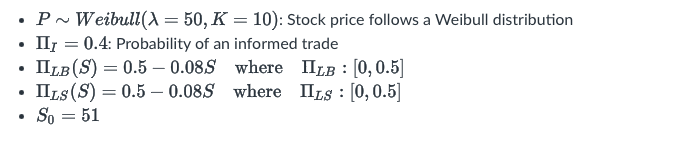


**Los objetivos del proyecto son:**
- Graficar la distribución del precio
- Crear una gráfica que nos muestre:
    - La utilidad esperada si todos los trades son líquidos
    - La utilidad esperada si hay un 40% de probabilidad de que se hagan trades informados
    - la utilidad esperada tomando en cuenta los parámetros mostrados con anterioridad
- Determinar el Bid y Ask optimos usando el modelo Copeland & Galai's.

### Función distribución Weisell (Distribución del precio)

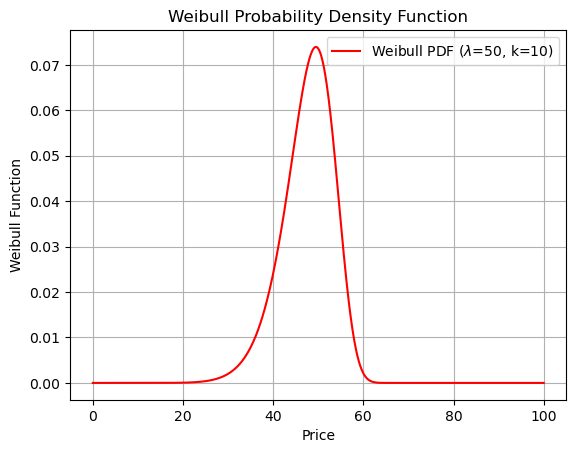

In [6]:
# Definimos el rango de valores para x
x = np.linspace(0, 100, 1000)
lambda_ = 50
k = 10

# Calculamos los valores de la función de densidad de probabilidad de Weibull
y = b_a.weibull_pdf(x, lambda_, k)

plt.plot(x, y, label=f'Weibull PDF ($\\lambda$={lambda_}, k={k})',color = 'red')
plt.xlabel('Price')
plt.ylabel('Weibull Function')
plt.title('Weibull Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


### Gráfica con el spot price, Bid y Ask optimizados

Optimal Bid: 47.874999999999986
Optimal Ask: 54.125000000000014


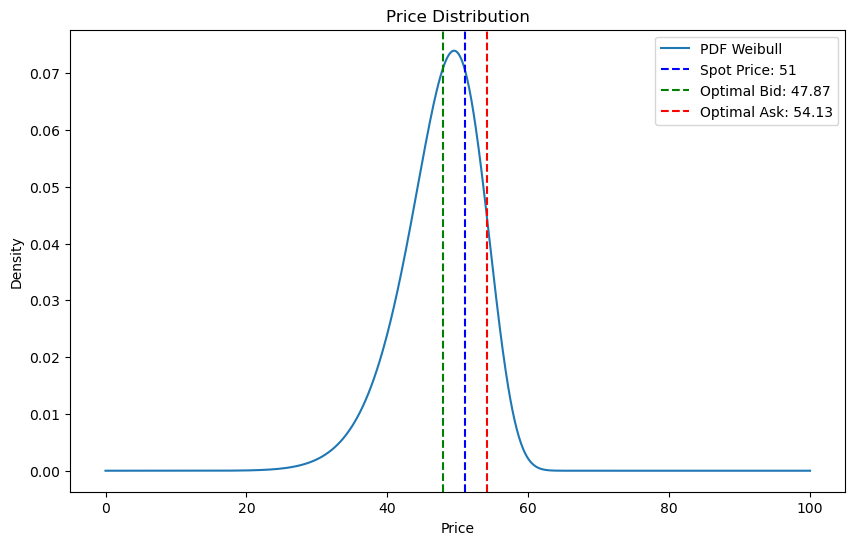

In [7]:
# Probabilidad de una operación informada
Pi_I = 0.4
# Precio inicial
S0 = 51

# Valores iniciales de B y A
initial_params = [S0 - 5, S0 + 5]

# Optimización
utility_func = partial(b_a.utility_function, S0=S0, lambda_=lambda_, k=k)
result = minimize(utility_func, initial_params, bounds=[(0, S0), (S0, 5*S0)])
bid_opt, ask_opt = result.x

# Mostrar los resultados
print(f'Optimal Bid: {bid_opt}')
print(f'Optimal Ask: {ask_opt}')

# Generar la distribución de precios y plot
prices = np.linspace(0, 100, 1000)
pdf_values = b_a.weibull_pdf(prices, lambda_, k)

plt.figure(figsize=(10, 6))
plt.plot(prices, pdf_values, label='PDF Weibull')
plt.axvline(S0, color='blue', linestyle='--', label=f'Spot Price: {S0}')
plt.axvline(bid_opt, color='green', linestyle='--', label=f'Optimal Bid: {bid_opt:.2f}')
plt.axvline(ask_opt, color='red', linestyle='--', label=f'Optimal Ask: {ask_opt:.2f}')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution')
plt.legend()
plt.show()

### Gráfica con las utilidades esperadas de trades liquidos, de 40% de trades informados y f(s)

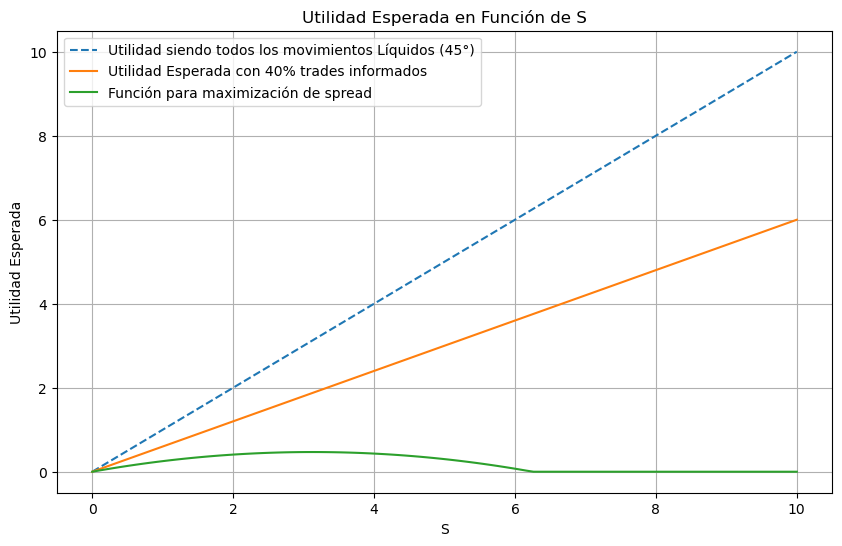

In [8]:
# Graficar la utilidad esperada

# Inputs que va a recibir nuestro código
# Parámetros iniciales
S = np.linspace(0, 10, 100)  # Rango de S
Pi_I = 0.4  # Probabilidad de transacción informada
Pi_LB = 0.5  # Probabilidad de transacción líquida bid
Pi_LS = 0.5  # Probabilidad de transacción líquida ask

# Utilidades (U) en función de S
U_informed = -S  # Utilidad para transacciones informadas (pérdida)
U_liquid = S     # Utilidad para transacciones líquidas (ganancia)

# Utilidad esperada considerando la probabilidad de transacciones informadas
E_U = (U_liquid*(1 - Pi_I))
E_U_Liquidez = [s * (1 - Pi_I) * b_a.pi_LS(s)  for s in S]
# E_U = PROBA DE TRANSACCIÓN INFORMADA * UTILIDAD PARA TRANSACCIONES INFORMADAS + (1-PROBABILIDA DE TRANSACCION INFORMADA) * UTILIDAD DE LAS TRANSACCIONES LIQUIDAS

plt.figure(figsize=(10, 6))
plt.plot(S, U_liquid, label='Utilidad siendo todos los movimientos Líquidos (45°)', linestyle='--')
plt.plot(S, E_U, label=f'Utilidad Esperada con 40% trades informados')
plt.plot(S, E_U_Liquidez, label = 'Función para maximización de spread')
plt.title('Utilidad Esperada en Función de S')
plt.xlabel('S')
plt.ylabel('Utilidad Esperada')
plt.legend()
plt.grid(True)
plt.show()

### Conclusiones: 

Con nuestro modelo en funcionamiento, con un spot price de 51 siguiendo una distribución de weibull obtuvimos que nuestro Bid óptimo fue de 47.87 mientras que nuestro Ask óptimo fue de 54.13, en esos valores estaríamos maximizando las utilidades por medio de spreads del market maker. 

Además como se puede ver en la plot de arriba, tenemos que nuestro punto óptimo del market maker es aproximadamente el 3, de esta manera si sigue subiendo el spread, el mercado va a dejar de comprar los instrumentos financieros vendidos por el market maker y por otra parte, si aumentamos nuestro spread > 6 podemos ver como se rije la función verde únicamente por una recta, esto quiere decir que el spread es tan caro, que el mercado ya no te va a comprar tus instrumentos financieros. 